In [1]:
import numpy as np

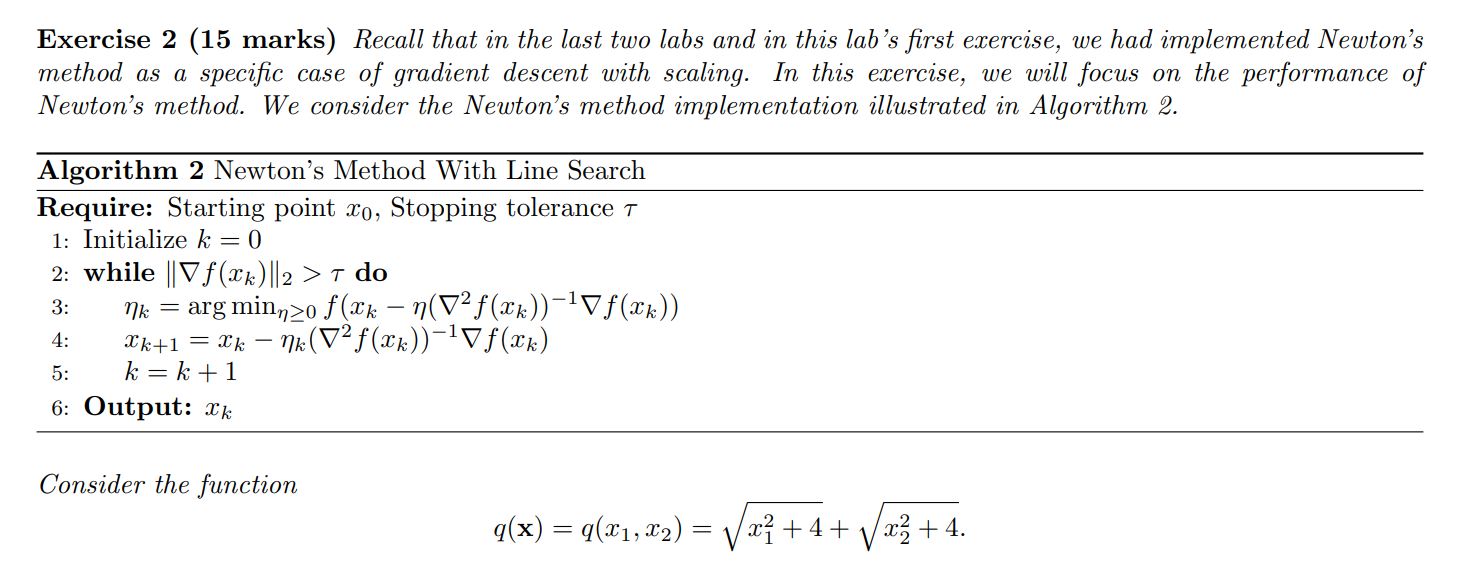

**Minimizer and Minimum Function Value**:
To find the minimizer and minimum function value of q(x), we need to find the critical points by taking the partial derivatives and setting them equal to zero.

Taking the partial derivatives:
$
q_{x_1}' = \frac{x_1}{\sqrt{x_1^2 + 4}}
q_{x_2}' = \frac{x_2}{\sqrt{x_2^2 + 4}}
$
Setting these derivatives to zero:
$
\frac{x_1}{\sqrt{x_1^2 + 4}} = 0 => x_1 = 0
\frac{x_2}{\sqrt{x_2^2 + 4}} = 0 => x_2 = 0
$
So, the minimizer is x* = (0, 0) and the minimum function value is q(x*) = sqrt(4) + sqrt(4) = 2 + 2 = 4.

**Uniqueness of Minimizer**:
In this case, the minimizer x* = (0, 0) is unique since there is only one critical point.

**Local or Global Minima**:
Since there is only one critical point and it is the minimum value of the function, it is both a local and global minimum.

**Convexity of q(x)**:
To determine if q(x) is convex, we need to check the Hessian matrix. The Hessian matrix is a square matrix of second-order partial derivatives of a scalar-valued function. If the Hessian matrix is positive definite, then the function is convex.

The Hessian matrix of q(x) is:$
[H] = [[q_{x_1x_1} q_{x_1x_2}],
      [q_{x_2x_1} q_{x_2x_2}]]
.$
To find the Hessian matrix of the function q(x), we need to compute the second-order partial derivatives.

The first-order partial derivatives are:
$
q_{x_1}' = \frac{x_1}{\sqrt{x_1^2 + 4}}, \quad q_{x_2}' = \frac{x_2}{\sqrt{x_2^2 + 4}}
$
Now, let's compute the second-order partial derivatives:
$
q_{x_1x_1}'' = \frac{\partial^2 q}{\partial x_1^2} = \frac{\partial}{\partial x_1} \left(\frac{x_1}{\sqrt{x_1^2 + 4}}\right)
$
Using the quotient rule, we have:
$
q_{x_1x_1}'' = \frac{\partial}{\partial x_1} \left(\frac{x_1}{\sqrt{x_1^2 + 4}}\right) = \frac{\sqrt{x_1^2 + 4} - \frac{x_1^2}{\sqrt{x_1^2 + 4}}}{x_1^2 + 4}
$
Similarly,
$
q_{x_2x_2}'' = \frac{\partial^2 q}{\partial x_2^2} = \frac{\partial}{\partial x_2} \left(\frac{x_2}{\sqrt{x_2^2 + 4}}\right)
$
Using the quotient rule:
$
q_{x_2x_2}'' = \frac{\partial}{\partial x_2} \left(\frac{x_2}{\sqrt{x_2^2 + 4}}\right) = \frac{\sqrt{x_2^2 + 4} - \frac{x_2^2}{\sqrt{x_2^2 + 4}}}{x_2^2 + 4}
$
The off-diagonal elements of the Hessian matrix are the mixed partial derivatives:
$
q_{x_1x_2}'' = q_{x_2x_1}'' = \frac{\partial^2 q}{\partial x_1 \partial x_2} = 0
$
Thus, the Hessian matrix H of q(x) is:
$
H = \begin{bmatrix}
q_{x_1x_1}'' & 0 \\
0 & q_{x_2x_2}''
\end{bmatrix}
$

In [2]:
def qx(x):
  q=np.sqrt(x[0]**2+4)+np.sqrt(x[1]**2+4)
  return q
def grad_qx(x):
  grad=np.array([x[0]/np.sqrt(x[0]**2+4),x[1]/np.sqrt(x[1]**2+4)])
  return grad
def hes_qx(x):
  hes=np.array([[4/(np.sqrt(x[0]**2+4)*(x[0]**2+4)),0],[0,4/(np.sqrt(x[1]**2+4)*(x[1]**2+4))]])
  return hes
hes_qx([2,2])
grad_qx([2,2])


array([0.70710678, 0.70710678])

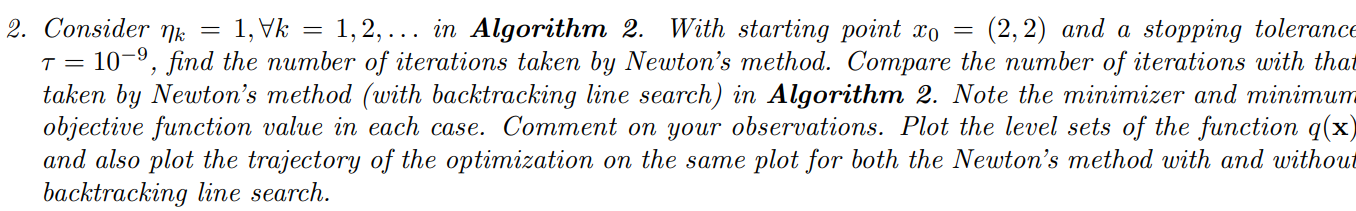

In [15]:
def newton_method_without_backtrack(x):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-6
  qx_norm=np.linalg.norm(grad_qx(x))
  optimal_value=[]
  optimizers=[]
  all_x=[]
  while qx_norm>tau:
    if k<150:#its an infinite loop because it is oscillating over any iteration therefore we take any value of k in particular i take k=150
      x=x-(np.linalg.inv(hes_qx(x))@grad_qx(x))
      qx_norm=np.linalg.norm(grad_qx(x))
      k=k+1
    else:
      break

    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(qx(x))




  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x

iteration_without_scale,optimal_value_without_scale,optimizers_without_scale,all_x_without_scale=newton_method_without_backtrack([2,2])
print(f'Iteration:{iteration_without_scale}')
print(f'optimizers:{optimizers_without_scale}')
print(f' optimal value:{optimal_value_without_scale}')


Iteration:[150]
optimizers:[array([2., 2.])]
 optimal value:[5.656854249492381]


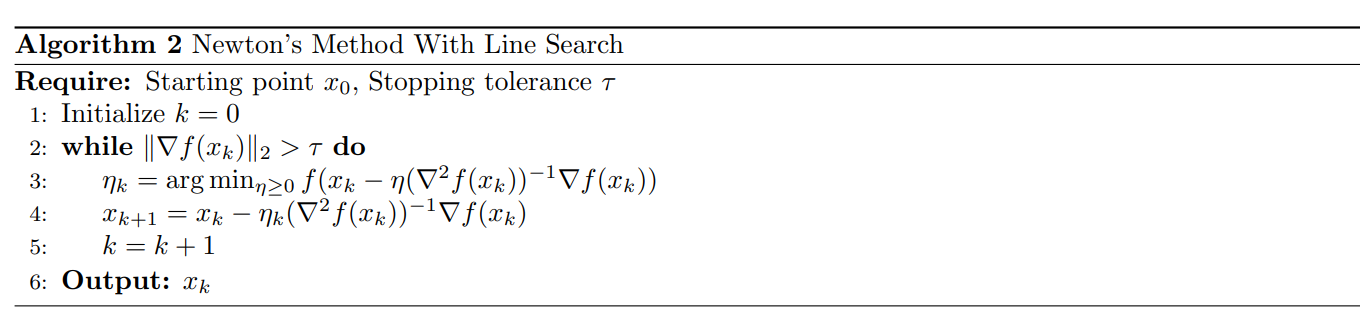

In [4]:
def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_qx(xk)
  while qx(xk + alpha*Dk@pk) > (qx(xk) + gamma*alpha*grad_qx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha



In [20]:
def newton_method_with_backtrack(x):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-6
  alpha0=1
  gamma=0.5
  optimal_value=[]
  optimizers=[]
  all_x=[]
  qx_norm=np.linalg.norm(grad_qx(x))

  while qx_norm>tau:
    all_x.append(x)
    Dk=np.linalg.inv(hes_qx(x))
    alpha=get_alpha_with_scaling(x, alpha0, 0.5, gamma, Dk)
    x=x-alpha*(np.linalg.inv(hes_qx(x))@grad_qx(x))
    qx_norm=np.linalg.norm(grad_qx(x))
    #print(x)
    k=k+1
    #print(qx_norm)
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(qx(x))
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x
iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack([2,2])
print(f'Iteration:{iteration_with_scale}')
print(f'optimizers:{optimizers_with_scale}')
print(f' optimal value:{optimal_value_with_scale}')

Iteration:[1]
optimizers:[array([0., 0.])]
 optimal value:[4.0]


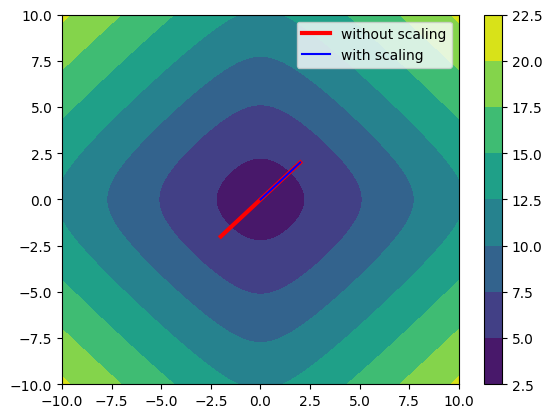

In [6]:
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
##Plotting Trajectory


x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)

xcordinates1 = [xk1[0] for xk1 in all_x_without_scale]
ycordinates1 = [xk1[1] for xk1 in all_x_without_scale]

plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling',linewidth=3)
xcordinates2 = [xk1[0] for xk1 in  all_x_with_scale]
ycordinates2 = [xk1[1] for xk1 in all_x_with_scale]
#print(xcordinates2)
plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
plt.legend()
plt.show()

#Observation:
By using eta=1 that is without backtracking for this function newton fails because it oscillates at [2,2] and [-2,-2] therefore the loops runs for infinite time it crash after long time but in newton with scale we got optimal value in one go thats why we can say with scaling is better than without and obtain optimal values very fast.


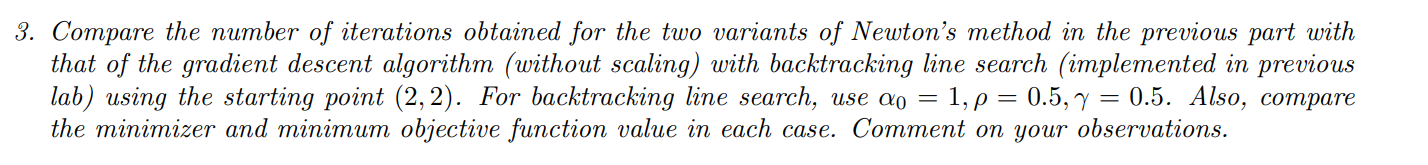

In [7]:
rho=0.9
def backtracking(x,rho):
  gamma=0.5
  alpha=1
  #print(grad_qx(x))

  pk=-1*np.array(grad_qx(x))

  k=0
  while np.array(qx(np.array(x)+alpha*pk))>(np.array(qx(x))+gamma*alpha*(np.array(grad_qx(x))@pk)):
    alpha=rho*alpha
    k+=1


  return alpha


In [26]:
#without scaling back track

def grad_descent_without_scale(x0):
  iteration=[]
  optimizers=[]
  optimal_value=[]
  x_all=[]
  cor=[]
  x=np.array(x0)
  pk=-grad_qx(x)
  qx_norm=np.linalg.norm(pk)
  #print(qx_norm)
  k=0
  tau=1e-9
  while qx_norm>tau:
    alpha=backtracking(x,0.5)
    cor.append(x)
    x=x+alpha*pk
    pk=-grad_qx(x)
    qx_norm=np.linalg.norm(pk)

    k=k+1

  iteration.append(k)
  optimizers.append(x)
  optimal_value.append(qx(x))
  x_all.append(cor)
  return iteration,optimizers,optimal_value,x_all
iteration_grad_without_scaling,optimizers_grad_without_scaling,opitmal_value_grad_without_scaling,x_all_grad_without_scaling=grad_descent_without_scale([2,2])
print(f'Iteration:{iteration_grad_without_scaling}')
print(f'optimizers:{optimizers_grad_without_scaling}')
print(f' optimal value:{opitmal_value_grad_without_scaling}')


Iteration:[32]
optimizers:[array([7.62525638e-10, 7.62525638e-10])]
 optimal value:[4.0]


In [9]:
x_all_grad_without_scaling

[[array([2, 2]),
  array([1.29289322, 1.29289322]),
  array([0.7500044, 0.7500044]),
  array([0.39887915, 0.39887915]),
  array([0.20329151, 0.20329151]),
  array([0.10216681, 0.10216681]),
  array([0.05114993, 0.05114993]),
  array([0.02558332, 0.02558332]),
  array([0.01279271, 0.01279271]),
  array([0.00639649, 0.00639649]),
  array([0.00319826, 0.00319826]),
  array([0.00159913, 0.00159913]),
  array([0.00079957, 0.00079957]),
  array([0.00039978, 0.00039978]),
  array([0.00019989, 0.00019989]),
  array([9.99457603e-05, 9.99457603e-05]),
  array([4.99728802e-05, 4.99728802e-05]),
  array([2.49864401e-05, 2.49864401e-05]),
  array([1.24932201e-05, 1.24932201e-05]),
  array([6.24661003e-06, 6.24661003e-06]),
  array([3.12330501e-06, 3.12330501e-06]),
  array([1.56165251e-06, 1.56165251e-06]),
  array([7.80826253e-07, 7.80826253e-07]),
  array([3.90413127e-07, 3.90413127e-07]),
  array([1.95206563e-07, 1.95206563e-07]),
  array([9.76032817e-08, 9.76032817e-08]),
  array([4.88016408e-0

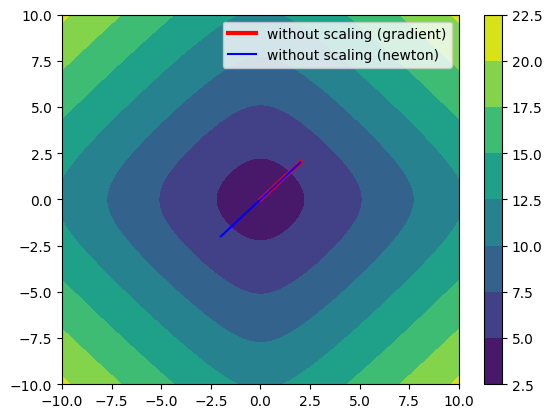

In [10]:
##Plotting Trajectory


x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)

xcordinates = [xk1[0] for xk1 in x_all_grad_without_scaling[0]]
ycordinates = [xk1[1] for xk1 in x_all_grad_without_scaling[0]]

plt.plot(xcordinates, ycordinates, color='red', label = 'without scaling (gradient)',linewidth=3)
xcordinates2 = [xk1[0] for xk1 in  all_x_without_scale]
ycordinates2 = [xk1[1] for xk1 in all_x_without_scale]
#print(xcordinates2)
plt.plot(xcordinates2, ycordinates2, color='blue', label = 'without scaling (newton)')
plt.legend()
plt.show()

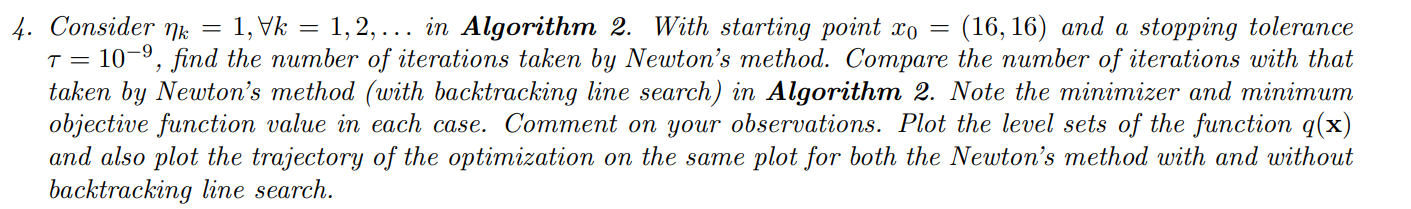

In [21]:
def newton_method_without_backtrack(x):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-9
  qx_norm=np.linalg.norm(grad_qx(x))
  optimal_value=[]
  optimizers=[]
  all_x=[]
  while qx_norm>tau:
    if k<150:
      x=x-(np.linalg.inv(hes_qx(x))@grad_qx(x))
      qx_norm=np.linalg.norm(grad_qx(x))
      k=k+1
    else:
      break
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(qx(x))



  a='infinite loop'
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x,a

iteration_without_scale,optimal_value_without_scale,optimizers_without_scale,all_x_without_scale,a=newton_method_without_backtrack([16,16])
print(f'Iteration:{iteration_without_scale}')
print(f'optimizers:{optimizers_without_scale}')
print(f' optimal value:{optimal_value_without_scale}')

Iteration:[5]
optimizers:[array([-5.64802792e+219, -5.64802792e+219])]
 optimal value:[inf]


<ipython-input-2-ac826a3914b3>:5: RuntimeWarning: overflow encountered in double_scalars
  grad=np.array([x[0]/np.sqrt(x[0]**2+4),x[1]/np.sqrt(x[1]**2+4)])
<ipython-input-2-ac826a3914b3>:2: RuntimeWarning: overflow encountered in double_scalars
  q=np.sqrt(x[0]**2+4)+np.sqrt(x[1]**2+4)


In [22]:
def newton_method_with_backtrack(x):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-9
  alpha0=1
  gamma=0.5
  optimal_value=[]
  optimizers=[]
  all_x=[]
  qx_norm=np.linalg.norm(grad_qx(x))

  while qx_norm>tau:
    all_x.append(x)
    Dk=np.linalg.inv(hes_qx(x))
    alpha=get_alpha_with_scaling(x, alpha0, 0.5, gamma, Dk)
    x=x-alpha*(np.linalg.inv(hes_qx(x))@grad_qx(x))
    qx_norm=np.linalg.norm(grad_qx(x))
    #print(x)
    k=k+1
    #print(qx_norm)
    all_x.append(x)
  optimizers.append(x)
  optimal_value.append(qx(x))
  iteration.append(k)
  return iteration,optimal_value,optimizers,all_x
iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack([16,16])
print(f'Iteration:{iteration_with_scale}')
print(f'optimizers:{optimizers_with_scale}')
print(f' optimal value:{optimal_value_with_scale}')

Iteration:[16]
optimizers:[array([8.34468061e-16, 8.34468061e-16])]
 optimal value:[4.0]


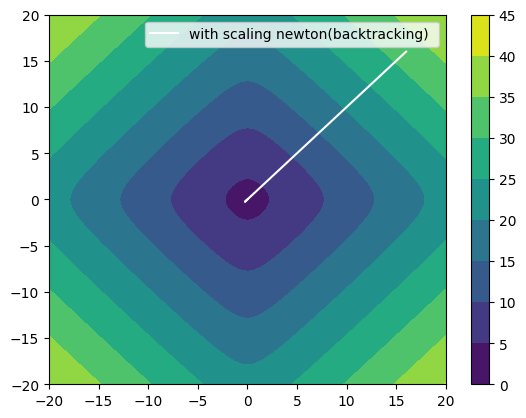

In [13]:
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
##Plotting Trajectory


x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = qx((X,Y))
p = plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)

# xcordinates1 = [xk1[0] for xk1 in all_x_without_scale]
# ycordinates1 = [xk1[1] for xk1 in all_x_without_scale]

# plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling',linewidth=3)
xcordinates2 = [xk1[0] for xk1 in  all_x_with_scale]
ycordinates2 = [xk1[1] for xk1 in all_x_with_scale]
#print(xcordinates2)
plt.plot(xcordinates2, ycordinates2, color='white', label = 'with scaling newton(backtracking) ')
plt.legend()
plt.show()

#Observation:
Similar to above part here also newton method without scaling runs infinite time and in case of scaling  we get optimal value in 16 iteration and it converges to our optimal value 4 at(0,0) so with backtracking with scaling here also we can obtain optimal but in other case we have infite number of iteration there fore its plot is not plotted .


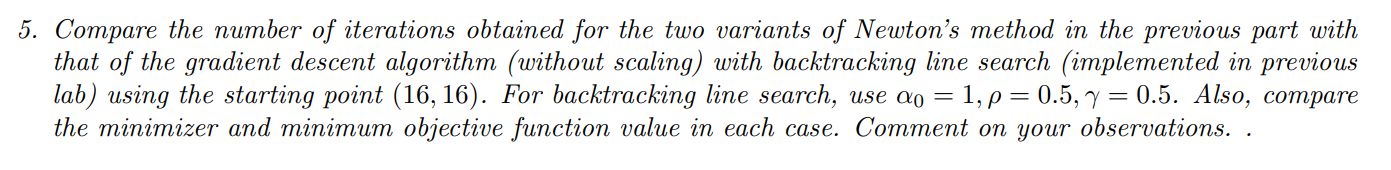

In [25]:
iteration_grad_without_scaling,optimizers_grad_without_scaling,opitmal_value_grad_without_scaling,x_all_grad_without_scaling=grad_descent_without_scale([16,16])
print(f'Iteration:{iteration_grad_without_scaling}')
print(f'optimizers:{optimizers_grad_without_scaling}')
print(f' optimal value:{opitmal_value_grad_without_scaling}')

Iteration:[46]
optimizers:[array([1.19947822e-09, 1.19947822e-09])]
 optimal value:[4.0]


**Observation:**

The optimal value is obtained in both of newton with scaling and gradient descent without scaling but in case of newton without scaling their is infinite loop where we didnot get any optimal value in both above cases we got optimal value 4 at (0,0) in last case in 46 iteration we get optimal value
In comaparision of iteration newton with scaling is better than gradient descent but in case of without scaling in newton their is infinite loop in this case but in previous lab we get optimal value or in case of quadratic equation we get optimal value in one itration but qx is not quadratic so in this case this one is drawback of newton.
